In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
titanic_train = pd.read_csv("data-files/a2.titanic-train.csv")
titanic_test = pd.read_csv("data-files/a2.titanic-test.csv")

titanic_train_backup = titanic_train.copy()
titanic_test_backup = titanic_test.copy()

In [132]:
titanic_train.info()
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [133]:
titanic_train.head()    # survived feature 포함 O
# titanic_test.head()   # survived feature 포함 X

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [134]:
titanic_train.describe()   # describe() : 수치화된 데이터를 통계

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [135]:
na = titanic_train.isna()
# na
# na.sum()  # True : 2 / False : 0 으로 해석
# type(na.sum())
# na.sum().sort_values(ascending=False)
na_ratio = na.sum() / na.count()
na_ratio.sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64

In [136]:
# NaN 데이터 제거 (열 제거 -NaN 비중이 높은 열 삭제)
# 방향으로 할때는 가로가 행, 세로가 열 / 하나를 찍었을떄는 반대로 가로가 열, 세로가 행
# titanic_train.drop('Cabin', axis=1) # 삭제한 복사본 생성
titanic_train.drop('Cabin', axis=1, inplace=True) # 원본에서 삭제
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [137]:
age_na_row = titanic_train['Age'].isna()

In [138]:
# 결측치(NaN) 처리 : 값 대체 (평균값으로 NaN을 대체)
age_mean = titanic_train["Age"].mean()     #NaN빼고 제거하고 계산
age_mean
titanic_train['Age'].fillna(age_mean, inplace=True) #원본 수정
titanic_train.loc[age_na_row]['Age']    #결측치에 대한 값

5      29.699118
17     29.699118
19     29.699118
26     29.699118
28     29.699118
         ...    
859    29.699118
863    29.699118
868    29.699118
878    29.699118
888    29.699118
Name: Age, Length: 177, dtype: float64

In [139]:
# 결측치(NaN) 처리 : 삭제( 행 삭제 -삭제하는 데이터 양이 적을 때 )
titanic_train.dropna(axis=0, inplace=True)
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [140]:
# reset_index : 새 인덱스를 만들고 원래 인덱스는 일반 컬럼으로 변경
temp_df = titanic_train.reset_index()
temp_df.tail()
# reset_index : 새 인덱스를 만들고 원래 인덱스는 제거
temp_df = titanic_train.reset_index(drop=True)
temp_df.tail()
# set_index : 특정 컬럼을 인덱스로 변경 사용
temp_df = titanic_train.set_index(['PassengerId'])
temp_df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.00,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.00,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.45,S
890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C
891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.75,Q


In [141]:
# 의미 없는 컬럼 제거
titanic_train.drop("PassengerId", axis=1 ,inplace=True)
titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [142]:
# 새 컬럼 추가 (여기서는 기존 컬럼의 데이터를 결합해서)
titanic_train["FamilySize"] = titanic_train['SibSp'] + titanic_train['Parch']
titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [143]:
# 관련 없는 컬럼 제거
titanic_train.drop(["Name","SibSp","Parch","Ticket"], axis=1, inplace=True)
titanic_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [144]:
# titanic_train_backup["Name"].str.split()    # 리스트로 나옴, 반복문 돌려 원하는 값을 뽑아야함.
# 문자열 안에서 [영문자 1개 이상 + '.']인 부분 문자열 추출 ->정규표현식 이용
# [A-Za-z] 대문자 A~Z, 소문자 a~z 만 가져오는데 '.'이 붙은부분이 오며 ()\. 
# ()부분만 캡처하고 \. 불러올때 '.'빼고 오라는 의미
title_column = titanic_train_backup["Name"].str.extract('([A-Za-z]+)\.')  
titanic_train['Title'] = title_column
titanic_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,0,3,male,22.0,7.2500,S,1,Mr
1,1,1,female,38.0,71.2833,C,1,Mrs
2,1,3,female,26.0,7.9250,S,0,Miss
3,1,1,female,35.0,53.1000,S,1,Mrs
4,0,3,male,35.0,8.0500,S,0,Mr


In [145]:
titanic_train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

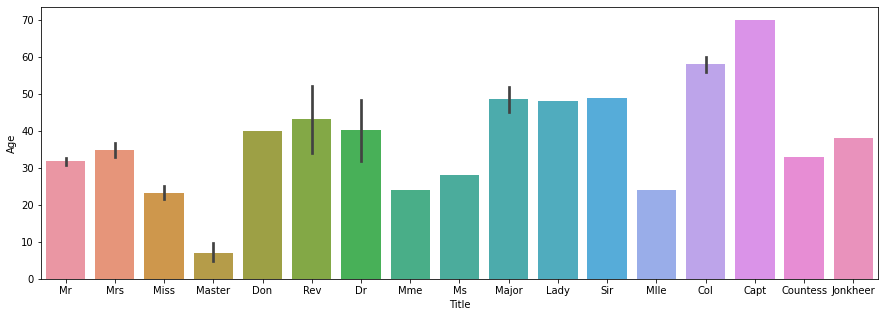

In [146]:
plt.figure(figsize=(15,5))
sns.barplot(x=titanic_train['Title'], y=titanic_train['Age'])
plt.show()  #각 title 평균값

In [147]:
# groupby : Title이 같은 데이터를 모아서 그룹별로 나이의 평균 계산
age_means_by_title = titanic_train.groupby('Title')['Age'].mean()
age_means_by_title

Title
Capt        70.000000
Col         58.000000
Countess    33.000000
Don         40.000000
Dr          40.242731
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       7.086662
Miss        23.260598
Mlle        24.000000
Mme         24.000000
Mr          31.753762
Mrs         34.837782
Ms          28.000000
Rev         43.166667
Sir         49.000000
Name: Age, dtype: float64

In [148]:
map_means = age_means_by_title.to_dict()
map_means

{'Capt': 70.0,
 'Col': 58.0,
 'Countess': 33.0,
 'Don': 40.0,
 'Dr': 40.242731092436976,
 'Jonkheer': 38.0,
 'Lady': 48.0,
 'Major': 48.5,
 'Master': 7.08666176470588,
 'Miss': 23.260597985050364,
 'Mlle': 24.0,
 'Mme': 24.0,
 'Mr': 31.753762088974813,
 'Mrs': 34.83778225806451,
 'Ms': 28.0,
 'Rev': 43.166666666666664,
 'Sir': 49.0}

In [149]:
# titanic_train['Title'].loc[idx_nan_age]   #NaN 인 것들만 가져옴. 둘다 같은값이 나온다
titanic_train['Title'][idx_nan_age].map(map_means)  # Nan값에 각 Title값의 평균값이 들어감

5      31.753762
17     31.753762
19     34.837782
26     31.753762
28     23.260598
         ...    
859    31.753762
863    23.260598
868    31.753762
878    31.753762
888    23.260598
Name: Title, Length: 177, dtype: float64

In [150]:
nan_age = titanic_train['Age'] == titanic_train_backup['Age'].mean()
idx_nan_age = titanic_train[nan_age].index
idx_nan_age
# titanic_train.loc[idx_nan_age, 'Age'] = titanic_train['Title'].loc[idx_nan_age].map(map_means)
titanic_train['Age2'] = titanic_train['Age']     # Age:전체평균 / Age2 : 그룹별 평균
titanic_train.loc[idx_nan_age, 'Age2'] = titanic_train['Title'].loc[idx_nan_age].map(map_means)

In [151]:
# NaN을 그룹별 평균으로 대체한 행에 표시
titanic_train["Imputed"] = 0
titanic_train.loc[idx_nan_age,"Imputed"] = 1
titanic_train.iloc[3:6]

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title,Age2,Imputed
3,1,1,female,35.000000,53.1000,S,1,Mrs,35.000000,0
4,0,3,male,35.000000,8.0500,S,0,Mr,35.000000,0
5,0,3,male,29.699118,8.4583,Q,0,Mr,31.753762,1


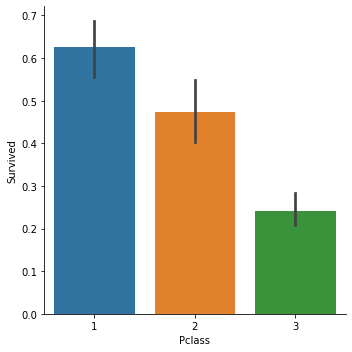

In [152]:
# sns.barplot()
sns.catplot(kind='bar', data=titanic_train, y='Survived', x='Pclass')
plt.show()

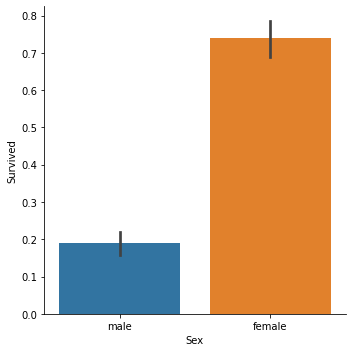

In [153]:
sns.catplot(kind='bar', data=titanic_train, y='Survived', x='Sex')
plt.show()

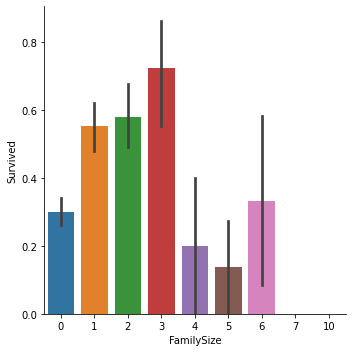

In [154]:
sns.catplot(kind='bar', data=titanic_train, y='Survived', x='FamilySize')
plt.show()

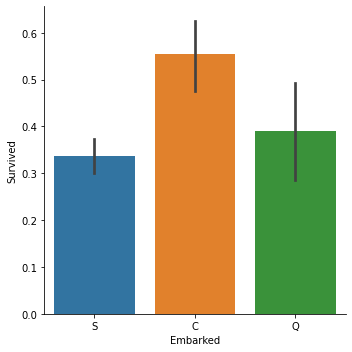

In [155]:
sns.catplot(kind='bar', data=titanic_train, y='Survived', x='Embarked')
plt.show()

<Figure size 1080x360 with 0 Axes>

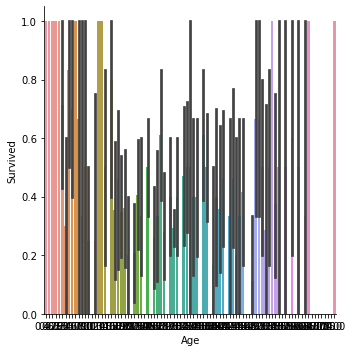

In [156]:
plt.figure(figsize=(15,5))  #
sns.catplot(kind='bar', data=titanic_train, y='Survived', x='Age')
plt.show()

In [157]:
# cut : 데이터를 몇 개의 범위를 기준으로 분류 / 
# bins : 0~15까지 1개, 15~50까지 1개, 50~200까지 1개  200대신 titanic_train['Age'].max() 값을 넣어도 무관하다.
titanic_train['AgeGroup'] = pd.cut(titanic_train['Age'],bins=[0,15,50,200], labels=['Child', 'Adult', 'Elder'])
titanic_train['AgeGroup'].head(10)

0    Adult
1    Adult
2    Adult
3    Adult
4    Adult
5    Adult
6    Elder
7    Child
8    Adult
9    Child
Name: AgeGroup, dtype: category
Categories (3, object): [Child < Adult < Elder]

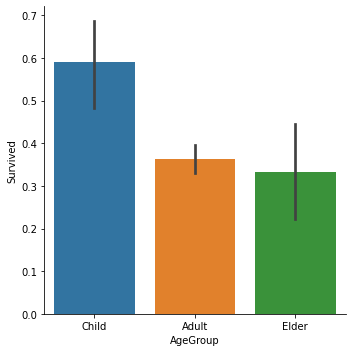

In [158]:
sns.catplot(kind='bar', data=titanic_train, y='Survived', x='AgeGroup')
plt.show()

In [159]:
titanic_train

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title,Age2,Imputed,AgeGroup
0,0,3,male,22.000000,7.2500,S,1,Mr,22.000000,0,Adult
1,1,1,female,38.000000,71.2833,C,1,Mrs,38.000000,0,Adult
2,1,3,female,26.000000,7.9250,S,0,Miss,26.000000,0,Adult
3,1,1,female,35.000000,53.1000,S,1,Mrs,35.000000,0,Adult
4,0,3,male,35.000000,8.0500,S,0,Mr,35.000000,0,Adult
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,S,0,Rev,27.000000,0,Adult
887,1,1,female,19.000000,30.0000,S,0,Miss,19.000000,0,Adult
888,0,3,female,29.699118,23.4500,S,3,Miss,23.260598,1,Adult
889,1,1,male,26.000000,30.0000,C,0,Mr,26.000000,0,Adult


In [160]:
# pd.get_dummies(titanic_train)
dummies = pd.get_dummies(titanic_train[['Sex','Embarked','AgeGroup']])
dummies

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,AgeGroup_Child,AgeGroup_Adult,AgeGroup_Elder
0,0,1,0,0,1,0,1,0
1,1,0,1,0,0,0,1,0
2,1,0,0,0,1,0,1,0
3,1,0,0,0,1,0,1,0
4,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...
886,0,1,0,0,1,0,1,0
887,1,0,0,0,1,0,1,0
888,1,0,0,0,1,0,1,0
889,0,1,1,0,0,0,1,0


In [161]:
# titanic_train과 dummis를 병합 (긴준 : 두 dataframe의 index)
merged_titanic_train = titanic_train.merge(dummies, left_index=True, right_index=True)
merged_titanic_train

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title,Age2,Imputed,AgeGroup,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,AgeGroup_Child,AgeGroup_Adult,AgeGroup_Elder
0,0,3,male,22.000000,7.2500,S,1,Mr,22.000000,0,Adult,0,1,0,0,1,0,1,0
1,1,1,female,38.000000,71.2833,C,1,Mrs,38.000000,0,Adult,1,0,1,0,0,0,1,0
2,1,3,female,26.000000,7.9250,S,0,Miss,26.000000,0,Adult,1,0,0,0,1,0,1,0
3,1,1,female,35.000000,53.1000,S,1,Mrs,35.000000,0,Adult,1,0,0,0,1,0,1,0
4,0,3,male,35.000000,8.0500,S,0,Mr,35.000000,0,Adult,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,S,0,Rev,27.000000,0,Adult,0,1,0,0,1,0,1,0
887,1,1,female,19.000000,30.0000,S,0,Miss,19.000000,0,Adult,1,0,0,0,1,0,1,0
888,0,3,female,29.699118,23.4500,S,3,Miss,23.260598,1,Adult,1,0,0,0,1,0,1,0
889,1,1,male,26.000000,30.0000,C,0,Mr,26.000000,0,Adult,0,1,1,0,0,0,1,0


In [162]:
merged_titanic_train.drop(['Sex','Embarked','AgeGroup','Title'], axis=1)

,Survived,Pclass,Age,Fare,FamilySize,Age2,Imputed,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,AgeGroup_Child,AgeGroup_Adult,AgeGroup_Elder
0,0,3,22.000000,7.2500,1,22.000000,0,0,1,0,0,1,0,1,0
1,1,1,38.000000,71.2833,1,38.000000,0,1,0,1,0,0,0,1,0
2,1,3,26.000000,7.9250,0,26.000000,0,1,0,0,0,1,0,1,0
3,1,1,35.000000,53.1000,1,35.000000,0,1,0,0,0,1,0,1,0
4,0,3,35.000000,8.0500,0,35.000000,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,13.0000,0,27.000000,0,0,1,0,0,1,0,1,0
887,1,1,19.000000,30.0000,0,19.000000,0,1,0,0,0,1,0,1,0
888,0,3,29.699118,23.4500,3,23.260598,1,1,0,0,0,1,0,1,0
889,1,1,26.000000,30.0000,0,26.000000,0,0,1,1,0,0,0,1,0
